In [1]:
#!pip install ultralytics
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
model = YOLO('yolov8x-pose-p6.pt')

### Display the image

In [4]:
def imshow(image, ax = None, title= None):
    if ax is None:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(title)
    else:
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.axis('off')

### Calculation of angles

In [5]:
def calculate_angle(p1, p2, p3):

    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)

    angle_rad = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    angle_deg = np.degrees(angle_rad)

    return angle_deg

In [6]:
def midpoint(p1,p2):

    x = (p1[0]+p2[0])/2
    y = (p1[1]+p2[1])/2

    return [x,y]

# Bowler

In [7]:
def draw_pose(frame,key):

    img = frame.copy()

    orange = (3, 198, 252)
    green = (3, 252, 115)
    blue = (252, 140, 3)

    # mid-point of shoulder and hip
    ms = midpoint(key[5],key[6])
    mh = midpoint(key[11],key[12])

    # segregating key points
    arm_points = {}
    for i in range(5,11):
        arm_points[i] = key[i]

    leg_points = {}
    for i in range(11,17):
        leg_points[i] = key[i]

    # assigning the line joining keypoints
    arms = {}
    for i in range(5,9):
        arms[str(i)+str(i+2)] = (key[i],key[i+2])
    arms['ms5'] = (ms,key[5])
    arms['ms6'] = (ms,key[6])

    legs = {}
    for i in range(11,15):
        legs[str(i)+str(i+2)] = (key[i],key[i+2])
    legs['mh11'] = (mh,key[11])
    legs['mh12'] = (mh,key[12])

    # spine line
    if ((ms == [0,0]) and (mh != [0,0])) or ((ms != [0,0]) and (mh == [0,0])):
        pass
    else:
        img = cv2.line(img, (int(ms[0]),int(ms[1])), (int(mh[0]),int(mh[1])), green, 4)

    # arms line
    for i in arms.values():
        if ((i[0] == [0,0]) and (i[1] != [0,0])) or ((i[1] == [0,0]) and (i[0] != [0,0])):
            pass
        else:
            img = cv2.line(img, (int(i[0][0]),int(i[0][1])), (int(i[1][0]),int(i[1][1])), blue, 4)

    # leg line
    for i in legs.values():
        if ((i[0] == [0,0]) and (i[1] != [0,0])) or ((i[1] == [0,0]) and (i[0] != [0,0])):
            pass
        else:
            img = cv2.line(img, (int(i[0][0]),int(i[0][1])), (int(i[1][0]),int(i[1][1])), orange, 4)

    # spine points
    if ms==[0,0]:
        pass
    else:
        img = cv2.circle(img, (int(ms[0]),int(ms[1])), 5, green,-1)
    if mh==[0,0]:
        pass
    else:
        img = cv2.circle(img, (int(mh[0]),int(mh[1])), 5, green,-1)

    # arms points
    for i in arm_points.values():
        if i==[0,0]:
            pass
        else:
            img = cv2.circle(img, (int(i[0]),int(i[1])), 5, blue,-1)

    # legs points
    for i in leg_points.values():
        if i==[0,0]:
            pass
        else:
            img = cv2.circle(img, (int(i[0]),int(i[1])), 5, orange,-1)

    # calculating angles
    rh = calculate_angle(key[6],key[8],key[10])
    lh = calculate_angle(key[5],key[7],key[9])
    rk = calculate_angle(key[12],key[14],key[16])
    lk = calculate_angle(key[11],key[13],key[15])
    vertical = [mh[0],img.shape[0]]
    sp = calculate_angle(ms,mh,vertical)

    # projecting the angles to the video
    if not np.isnan(rh):
        img = cv2.putText(img, f"Right Hand Angle: {rh:.3f} degrees", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    else:
        img = cv2.putText(img, f"Right Hand Not Detected", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    if not np.isnan(lh):
        img = cv2.putText(img, f"Left Hand Angle: {lh:.3f} degrees", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    else:
        img = cv2.putText(img, f"Left Hand Not Detected", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    if not np.isnan(sp):
        img = cv2.putText(img, f"Spine Angle: {sp:.3f} degrees", (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    else:
        img = cv2.putText(img, f"Spine Not Detected", (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    if not np.isnan(rk):
        img = cv2.putText(img, f"Right Knee Angle: {rk:.3f} degrees", (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    else:
        img = cv2.putText(img, f"Right Knee Not Detected", (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    if not np.isnan(lk):
        img = cv2.putText(img, f"Left Knee Angle: {lk:.3f} degrees", (10, 190), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    else:
        img = cv2.putText(img, f"Left Knee Not Detected", (10, 190), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    return img

# Bowler Details

In [8]:
def otw(image,size,res,t1,t2):
    frame = image.copy()
    if (t1==0 and t2==0):
        seg = res[0].boxes.xyxy.tolist()
        for j,i in enumerate(seg):
            if (i[2]<=size[0]/2): #and i[1]>size[1]/4):
                keypoints = res[0].keypoints.xy[j].tolist()
                img = draw_pose(frame, keypoints)

    if (t1==1 and t2==0):
        seg = res[0].boxes.xyxy.tolist()
        for j,i in enumerate(seg):
            if (i[2]>=size[0]/2): #and i[1]>size[1]/4):
                keypoints = res[0].keypoints.xy[j].tolist()
                img = draw_pose(frame, keypoints)
    return img

In [9]:
def atw(image,size,res,t1,t2):
    frame = image.copy()
    if (t1==1 and t2==1):
        seg = res[0].boxes.xyxy.tolist()
        for j,i in enumerate(seg):
            if (i[2]<=size[0]/2): #and i[1]>size[1]/4):
                keypoints = res[0].keypoints.xy[j].tolist()
                img = draw_pose(frame, keypoints)

    if (t1==0 and t2==1):
        seg = res[0].boxes.xyxy.tolist()
        for j,i in enumerate(seg):
            if (i[2]>=size[0]/2): #and i[1]>size[1]/4):
                keypoints = res[0].keypoints.xy[j].tolist()
                img = draw_pose(frame, keypoints)
    return img

In [10]:
def video_process(vid_name,t1,t2):

    cap = cv2.VideoCapture(vid_name)

    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    size = (frame_width, frame_height)
    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(f"{vid_name.split('.')[0]}_output.mp4", fourcc, fps, size)
    frames = 0
    while cap.isOpened():
        success, frame = cap.read()
        frames+=1
        draw = 0
        if success:
            res = model.predict(frame)
            seg = res[0].boxes.xyxy.tolist()
            for j,i in enumerate(seg):
                if (i[2]<=size[0]/2): #and i[1]>size[1]/4):
                    print("Frame : ",frames)
                    keypoints = res[0].keypoints.xy[j].tolist()
                    img = draw_pose(frame, keypoints)
                    draw = 1
            if draw == 1:
                if t2==0:
                    img = otw(frame,size,res,t1,t2)
                else:
                    img = atw(frame,size,res,t1,t2)
            else:
                print("Frame : ",frames)
                img = frame

            out.write(img)
            # imshow(img)
            # plt.show()
        else:
            break

    cap.release()
    out.release()

In [11]:
import ipywidgets as widgets
from IPython.display import display

# Create the file upload widget
uploader = widgets.FileUpload(
    accept='.mp4,.avi',
    multiple=False  # Do not allow multiple file uploads
)

# Create a label to display the uploaded file name
file_name_label = widgets.Label(value="No file uploaded")

# Create the toggle button widgets
toggle1 = widgets.ToggleButtons(
    options=['Right Arm Bowler', 'Left Arm Bowler'],
    description='Bowler Type :',
    disabled=False,
    button_style='info'
)

toggle2 = widgets.ToggleButtons(
    options=['Over The Wicket', 'Round The Wicket'],
    description='Bowler Position :',
    disabled=False,
    button_style='success'
)


submit_button = widgets.Button(
    description='Submit',
    button_style='',  # Button color
    tooltip='Click to submit'
)

output = widgets.Output()

def display_selections(change=None):
    with output:
        output.clear_output()
        t1 = toggle1.get_state()['index']
        t2 = toggle2.get_state()['index']
        print(t1)
        print(t2)
        video_process(uploader.value[0]['name'],t1,t2) # replace with uploader.value[0]['name'] in local and exact file name in colab


# Function to update the file name label
def on_file_upload(change):
    file_name = uploader.value[0]['name']
    file_name_label.value = f" {file_name}"

# Observe file upload
uploader.observe(on_file_upload, names='value')

submit_button.on_click(display_selections)

# Display the widgets
display(widgets.HBox([uploader, file_name_label]), toggle1, toggle2, submit_button,output)


ToggleButtons(button_style='info', description='Bowler Type :', options=('Right Arm Bowler', 'Left Arm Bowler'…

ToggleButtons(button_style='success', description='Bowler Position :', options=('Over The Wicket', 'Round The …

Button(description='Submit', style=ButtonStyle(), tooltip='Click to submit')

Output()

### Image Testing

Number of Frames :  47
Resolution :  (1920, 1080)


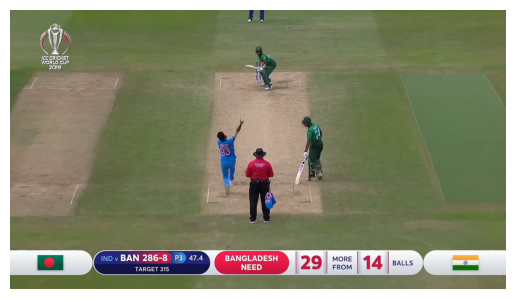

In [14]:
video_path = uploader.value[0]['name']
cap = cv2.VideoCapture(video_path)

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Number of Frames : ",total_frames)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

size = (frame_width, frame_height)
print("Resolution : ",size)

cap.set(cv2.CAP_PROP_POS_FRAMES, int(total_frames/3.5)) # get some random frame
ret, frame = cap.read()


if ret:
    imshow(frame)
else:
    print("Error reading frame")

cap.release()

In [15]:
results1= model.predict(frame)


0: 768x1280 4 persons, 222.6ms
Speed: 7.0ms preprocess, 222.6ms inference, 87.0ms postprocess per image at shape (1, 3, 768, 1280)


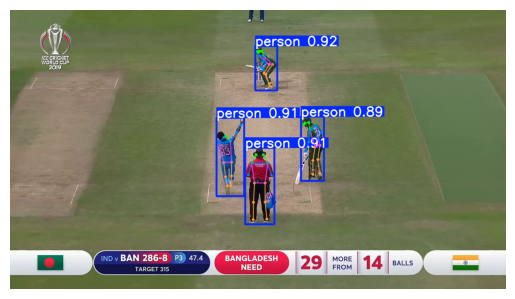

In [16]:
imshow(results1[0].plot())

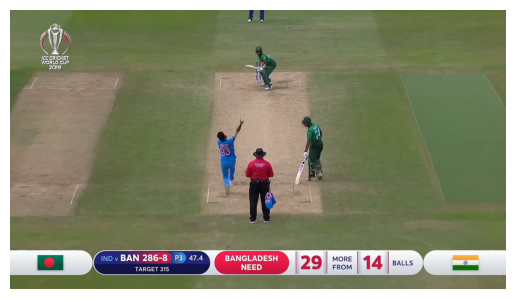

In [17]:
imshow(frame)

In [18]:
l = results1[0].keypoints.xy[1].tolist()
img = draw_pose(frame,l)

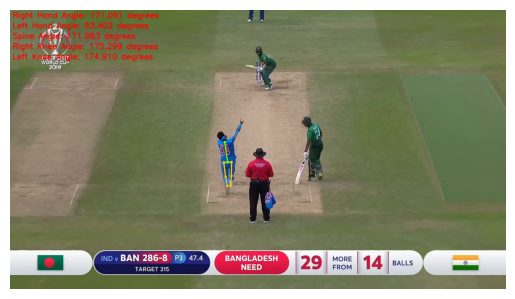

In [19]:
imshow(img)

In [20]:
cv2.imwrite('input.jpg', frame)
cv2.imwrite('output.jpg', img)

True